In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data set
wine = pd.read_csv("WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# shape of the dataset
wine.shape

(1143, 13)

In [6]:
# Infor of data set
wine.info()
# from this it can seen that there is null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
# Checking for duplicate values
wine.duplicated().value_counts()

False    1143
dtype: int64

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

## Data Viaualization

<AxesSubplot:xlabel='quality', ylabel='count'>

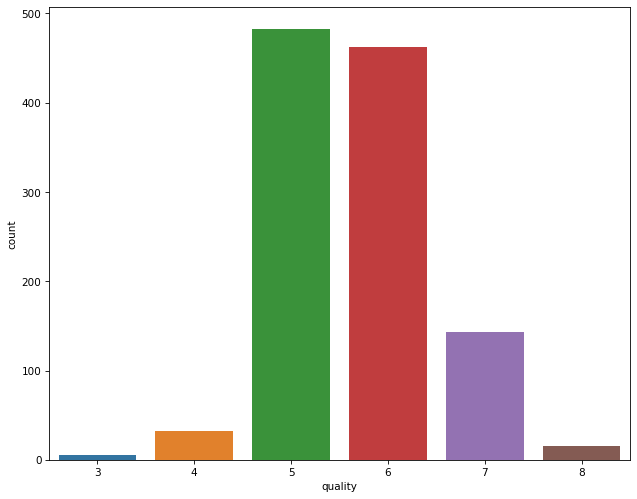

In [10]:
plt.figure(figsize=(10,8), dpi=75)
sns.countplot(wine['quality'])

In [11]:
wine['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [13]:
col = wine.columns[:11]
col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

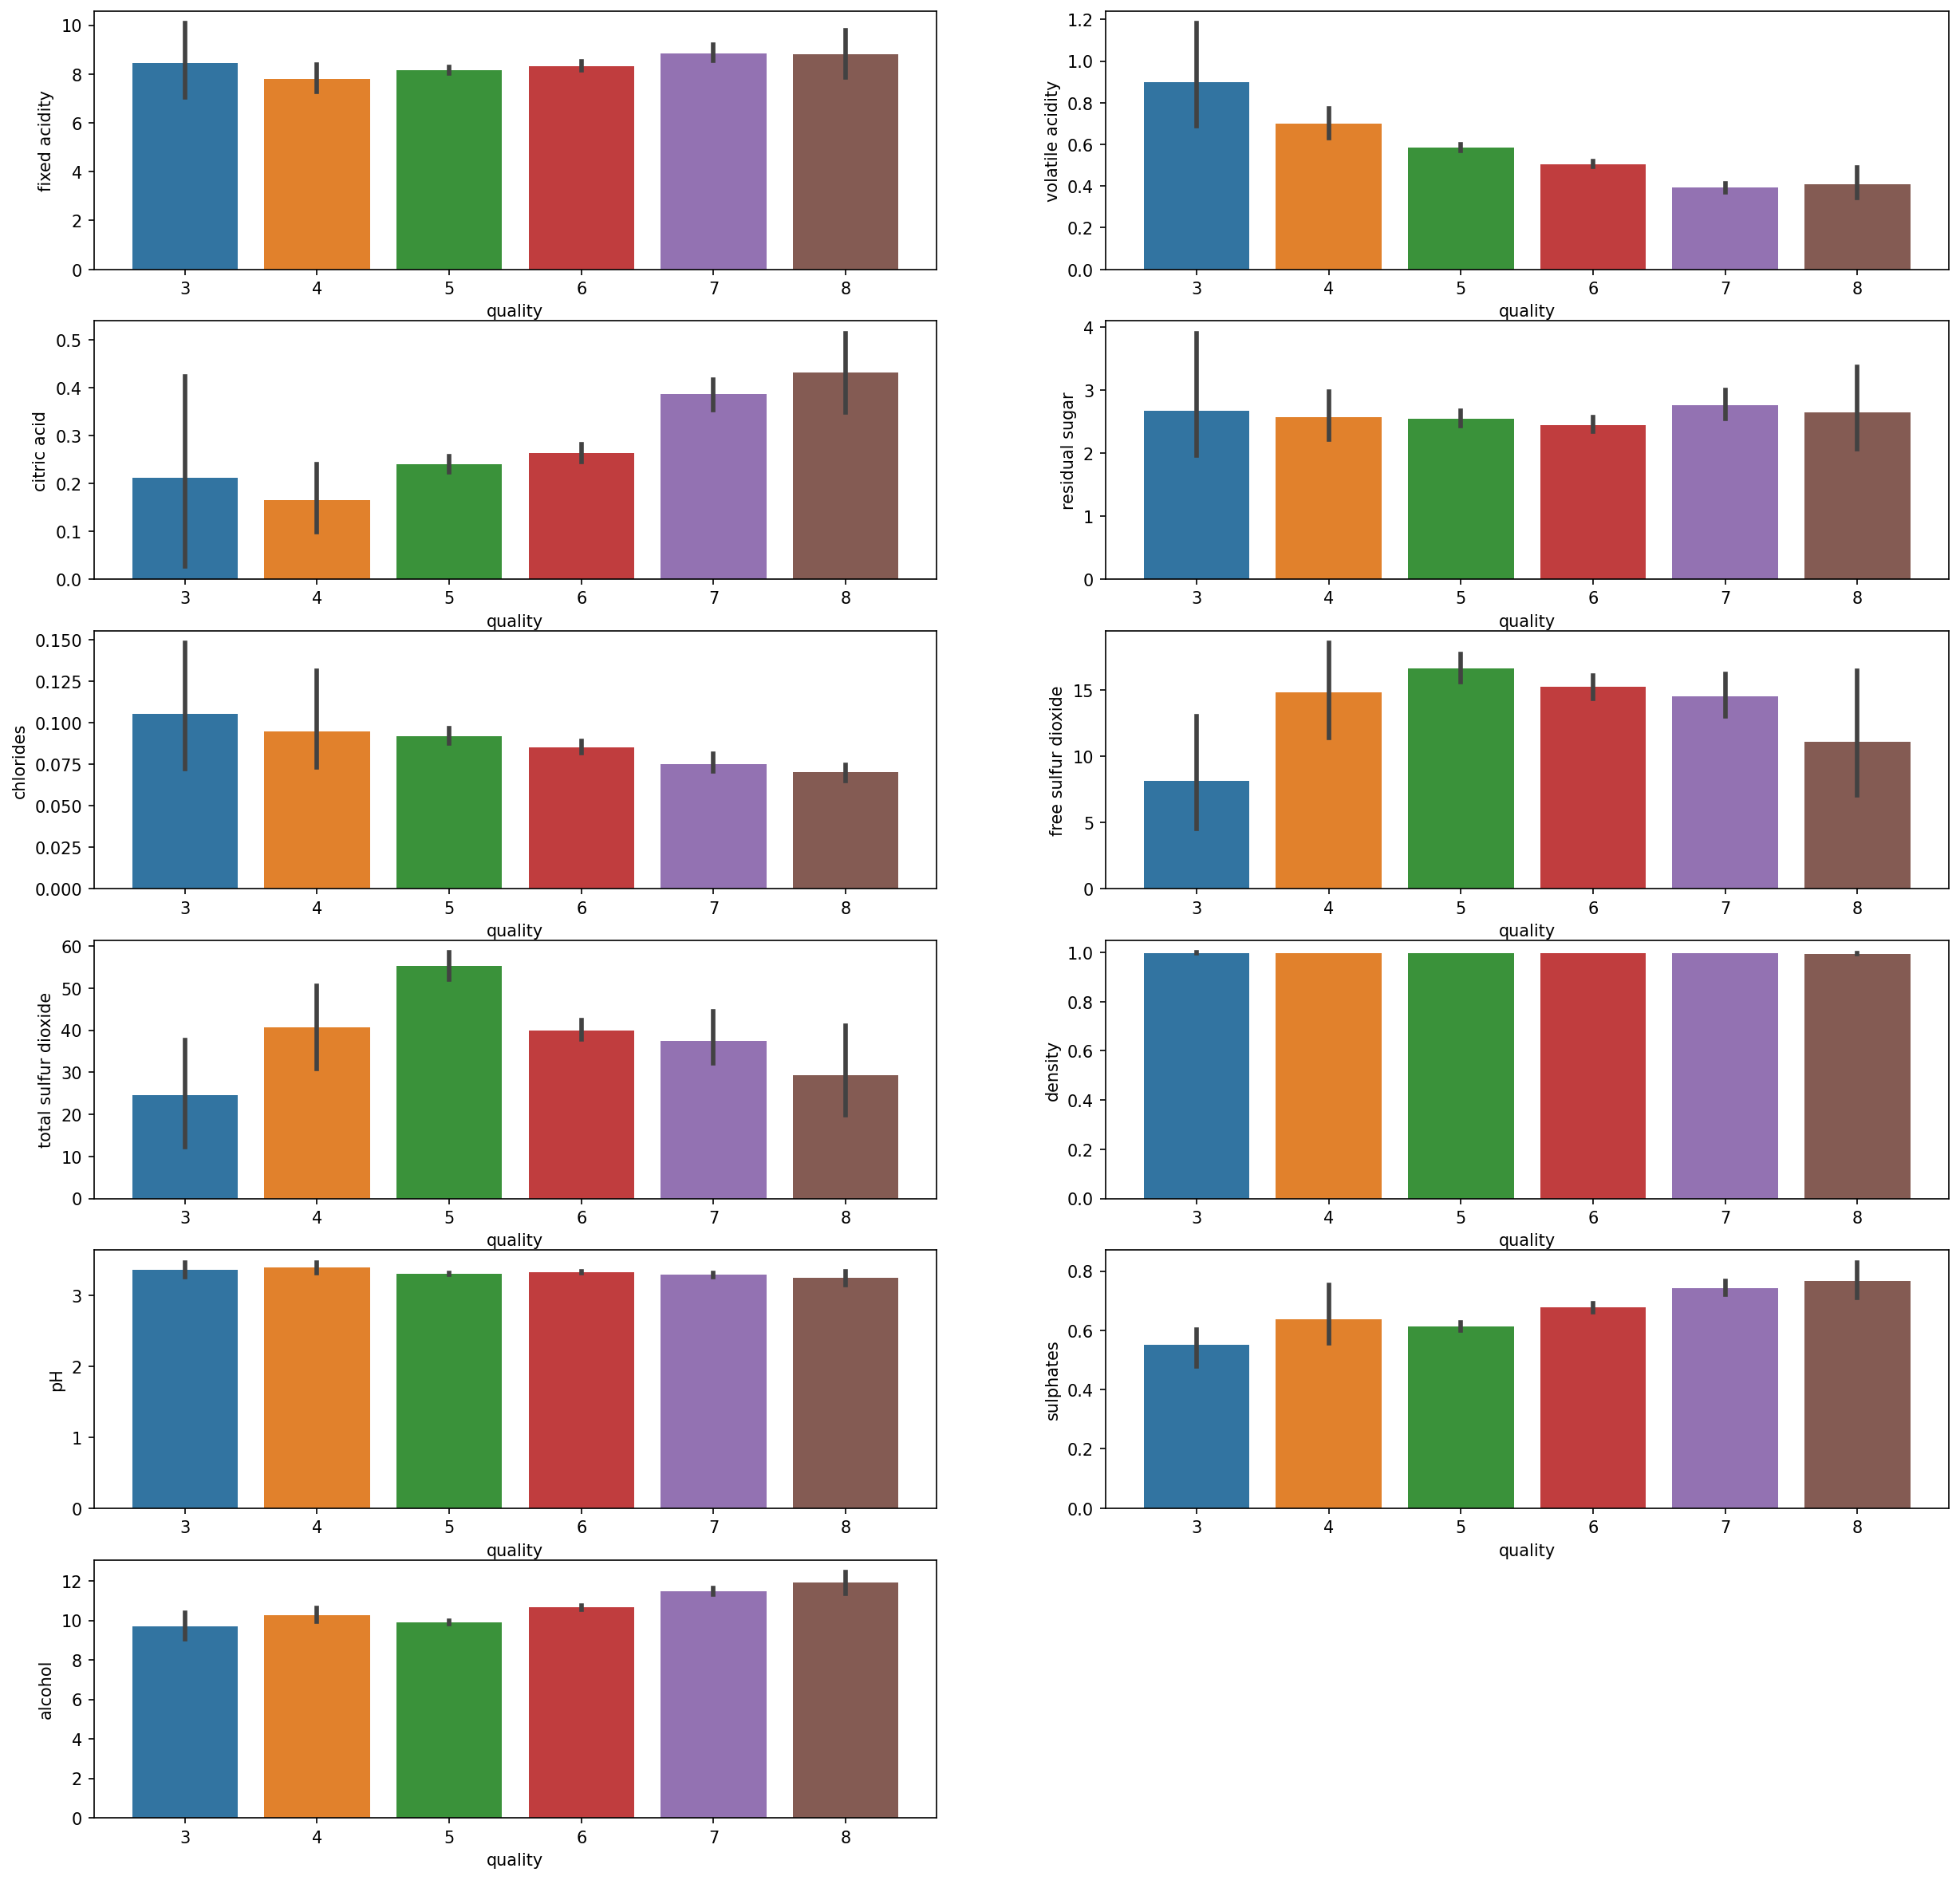

In [22]:
plt.figure(figsize=(20, 20), dpi=150)
for i, c in enumerate(col):
    plt.subplot(6,2, i+1)
    sns.barplot(x=wine['quality'], y=wine[c])
    plt.plot()

# Observation on the above barplot
* PH, Density and fixed acidity(nearly)are equal in all the types of wine quality
* volatile acidity is hign in 3 and thereafter it gradually decresed till 8
* citric acid content is high in 8 and low in 4
* total sulfur dioxide content high in 5

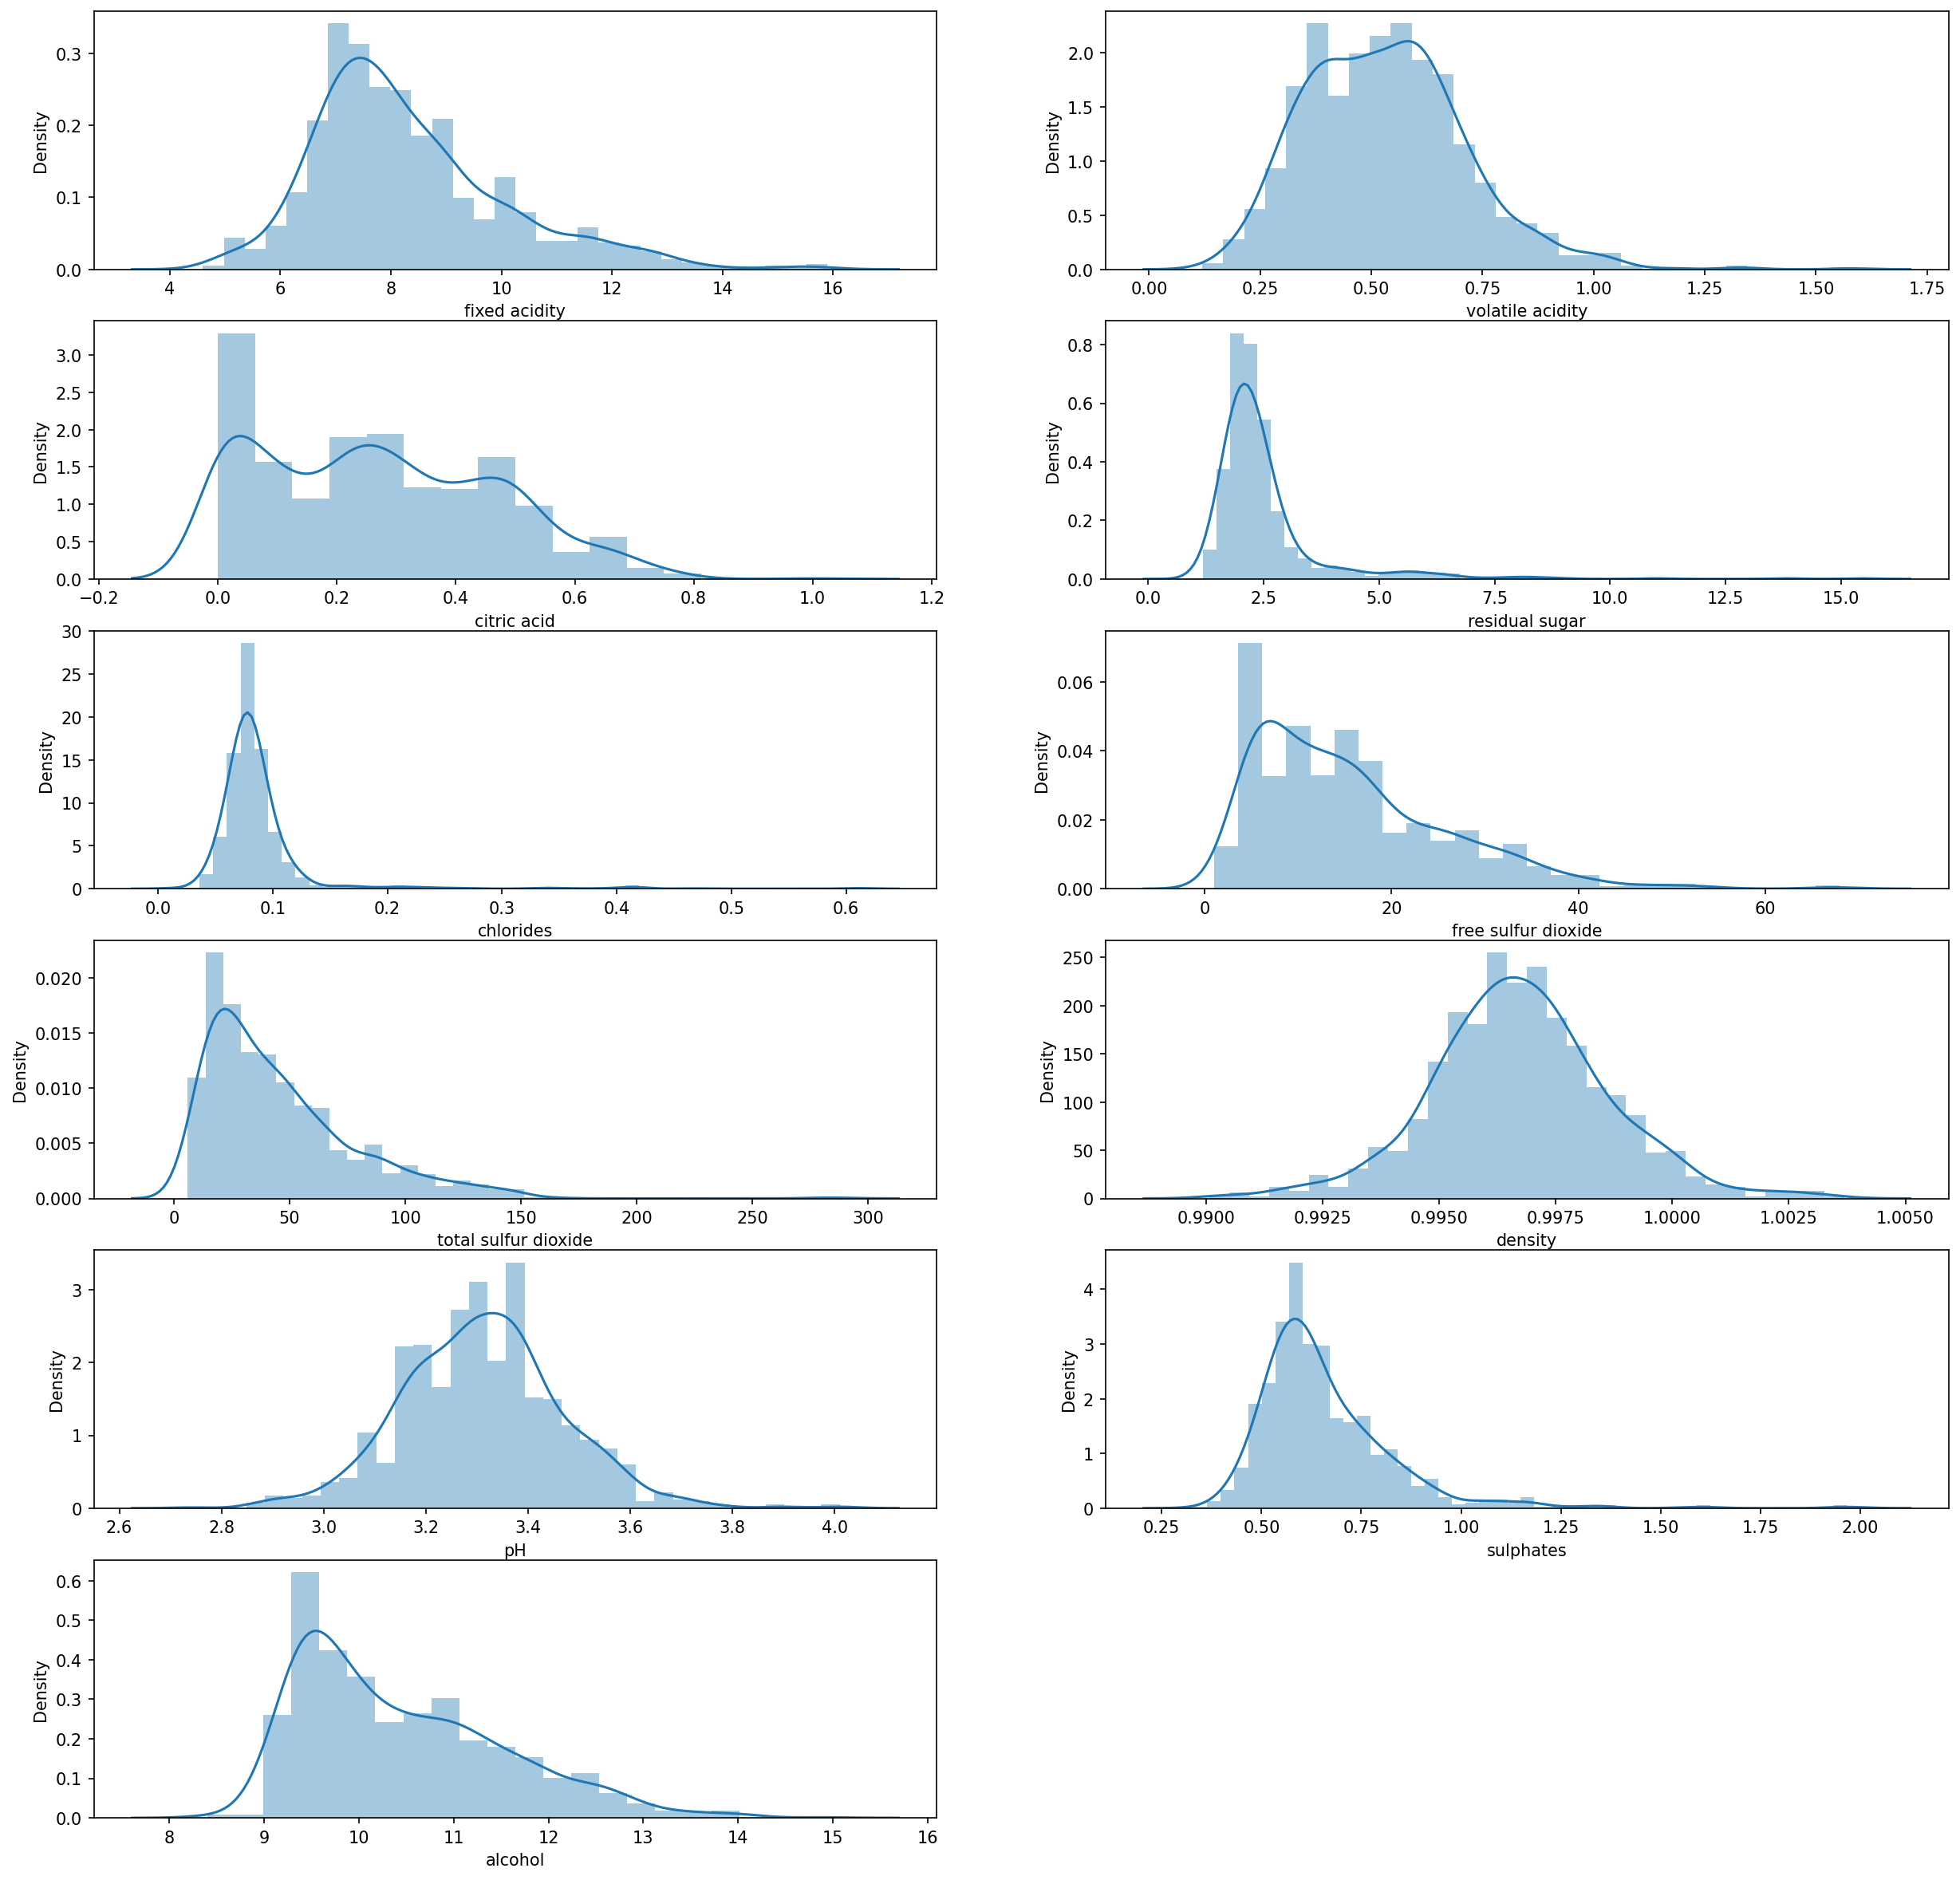

In [23]:
plt.figure(figsize=(20, 20), dpi=150)
for i, c in enumerate(col):
    plt.subplot(6,2, i+1)
    sns.distplot(wine[c])
    plt.plot()

[]

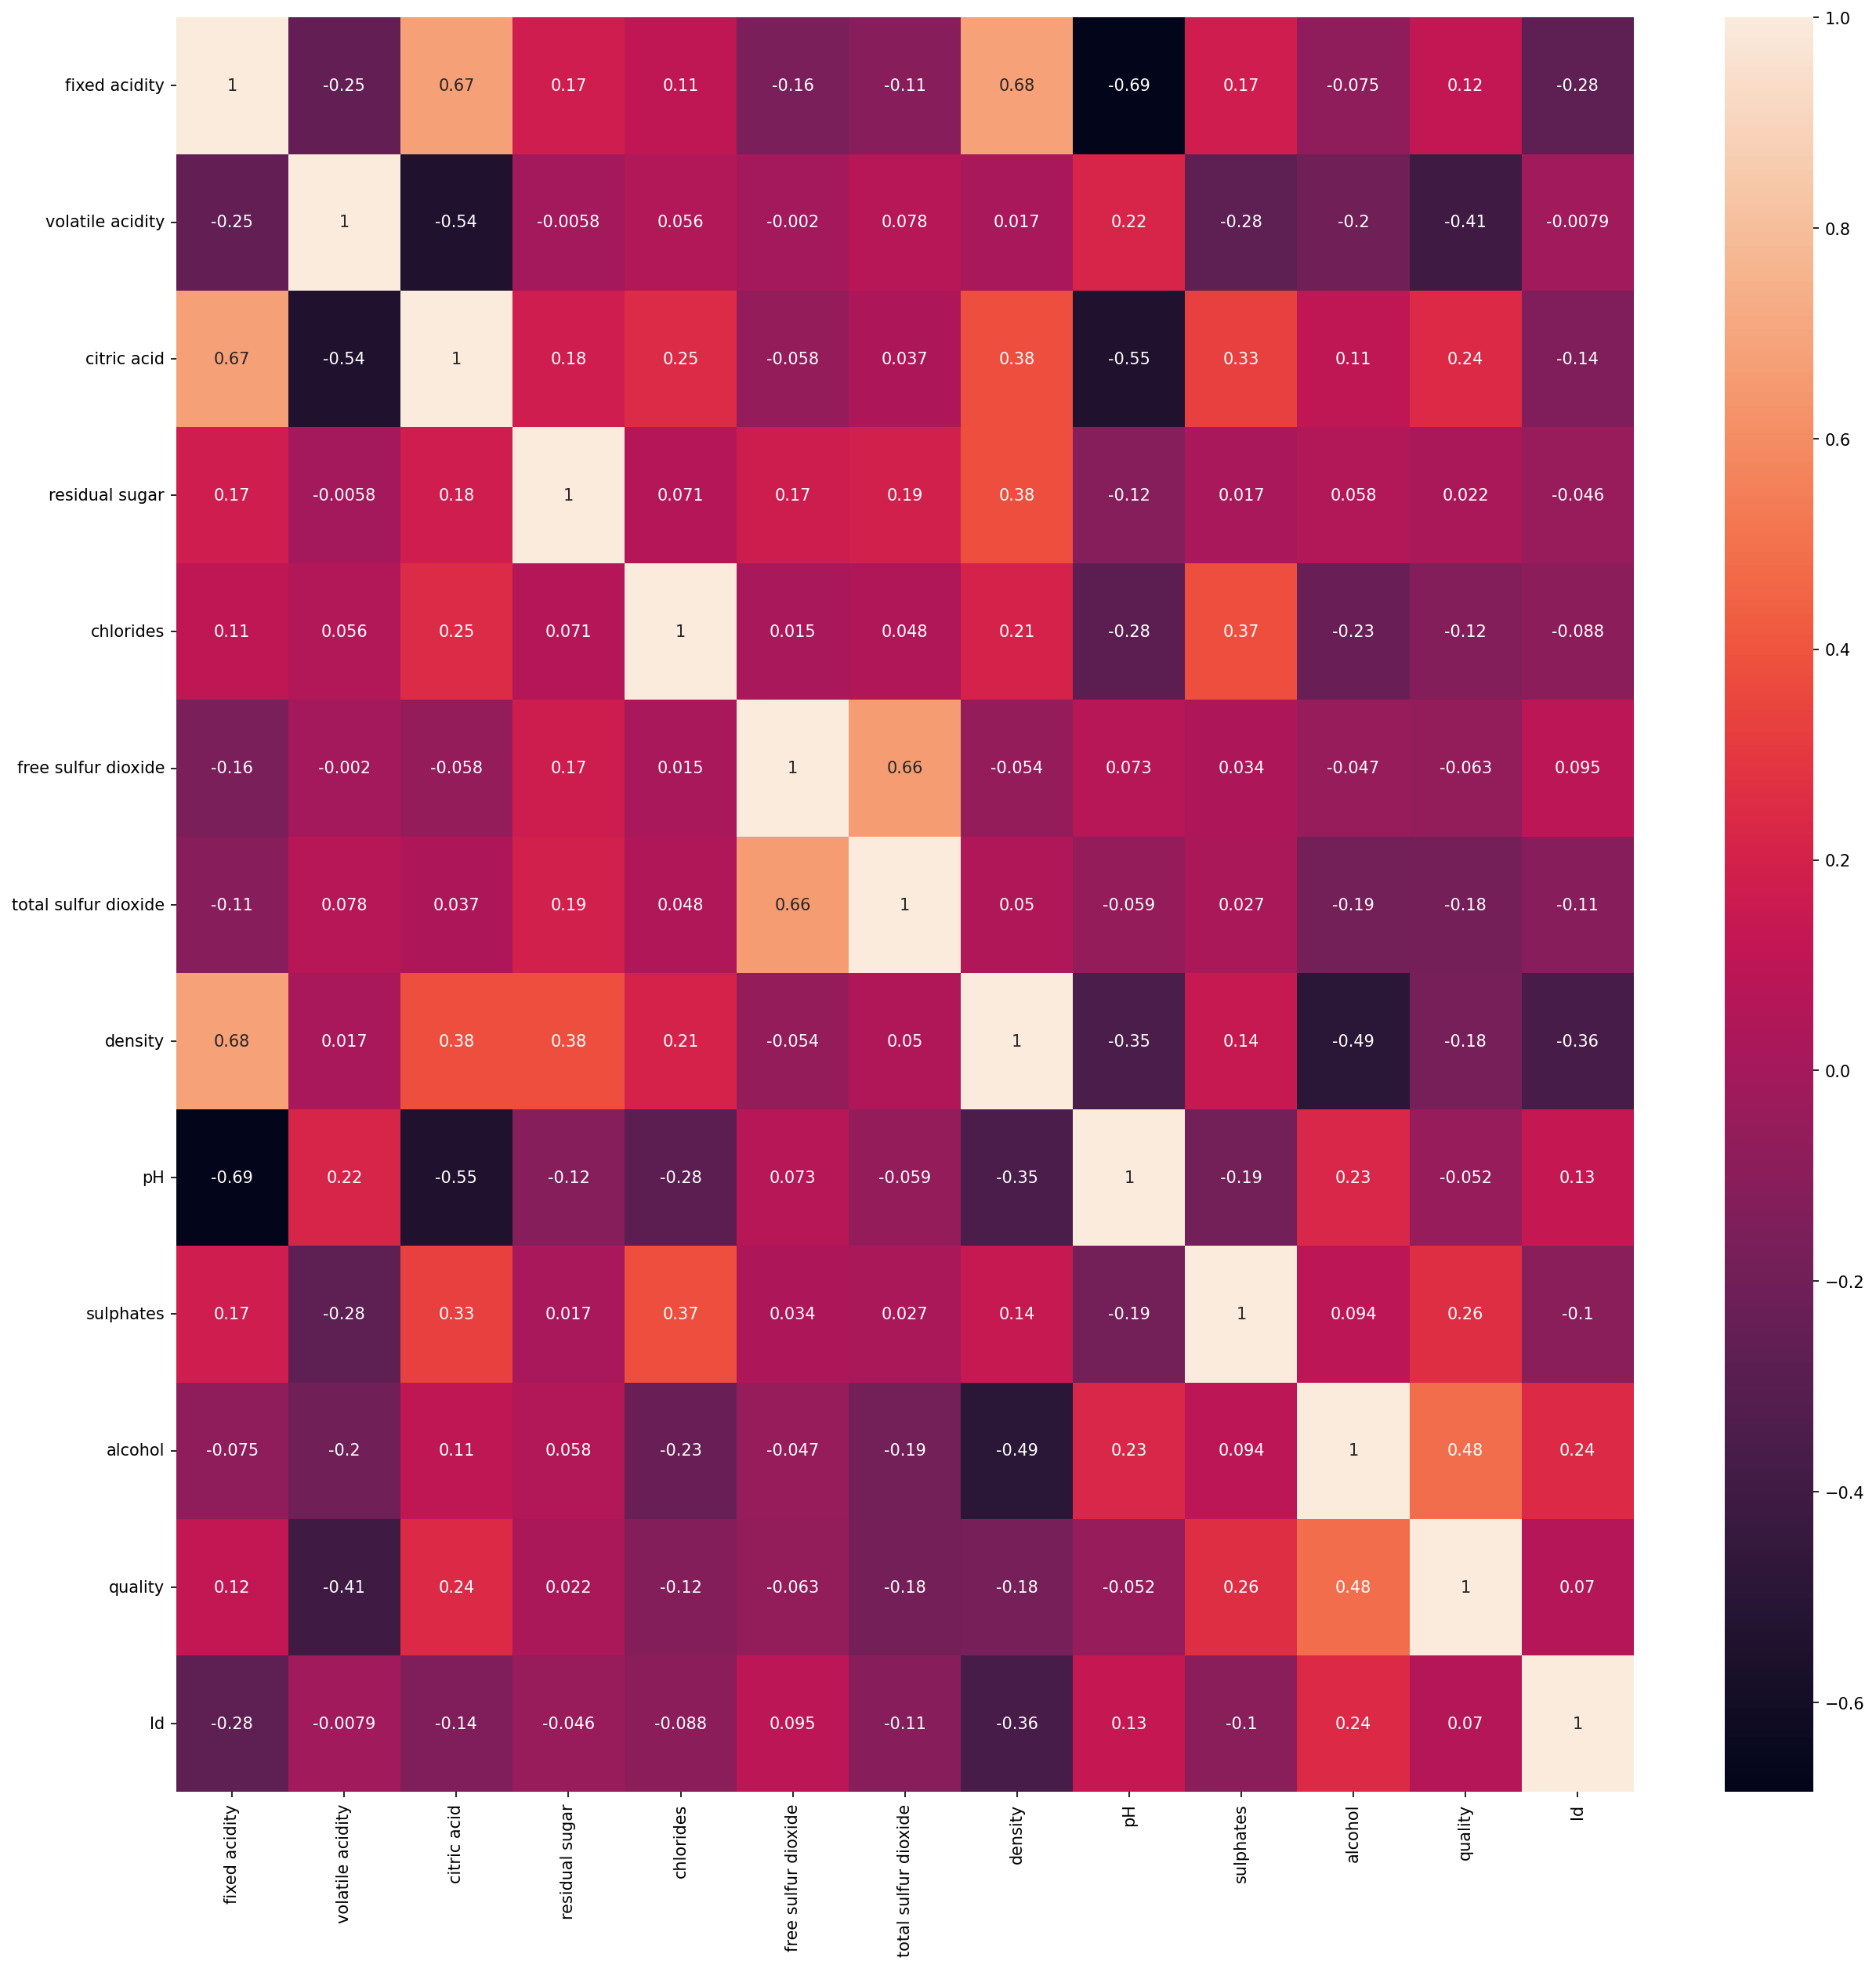

In [24]:
plt.figure(figsize=(20, 20), dpi=150)
sns.heatmap(wine.corr(), annot=True)
plt.plot()

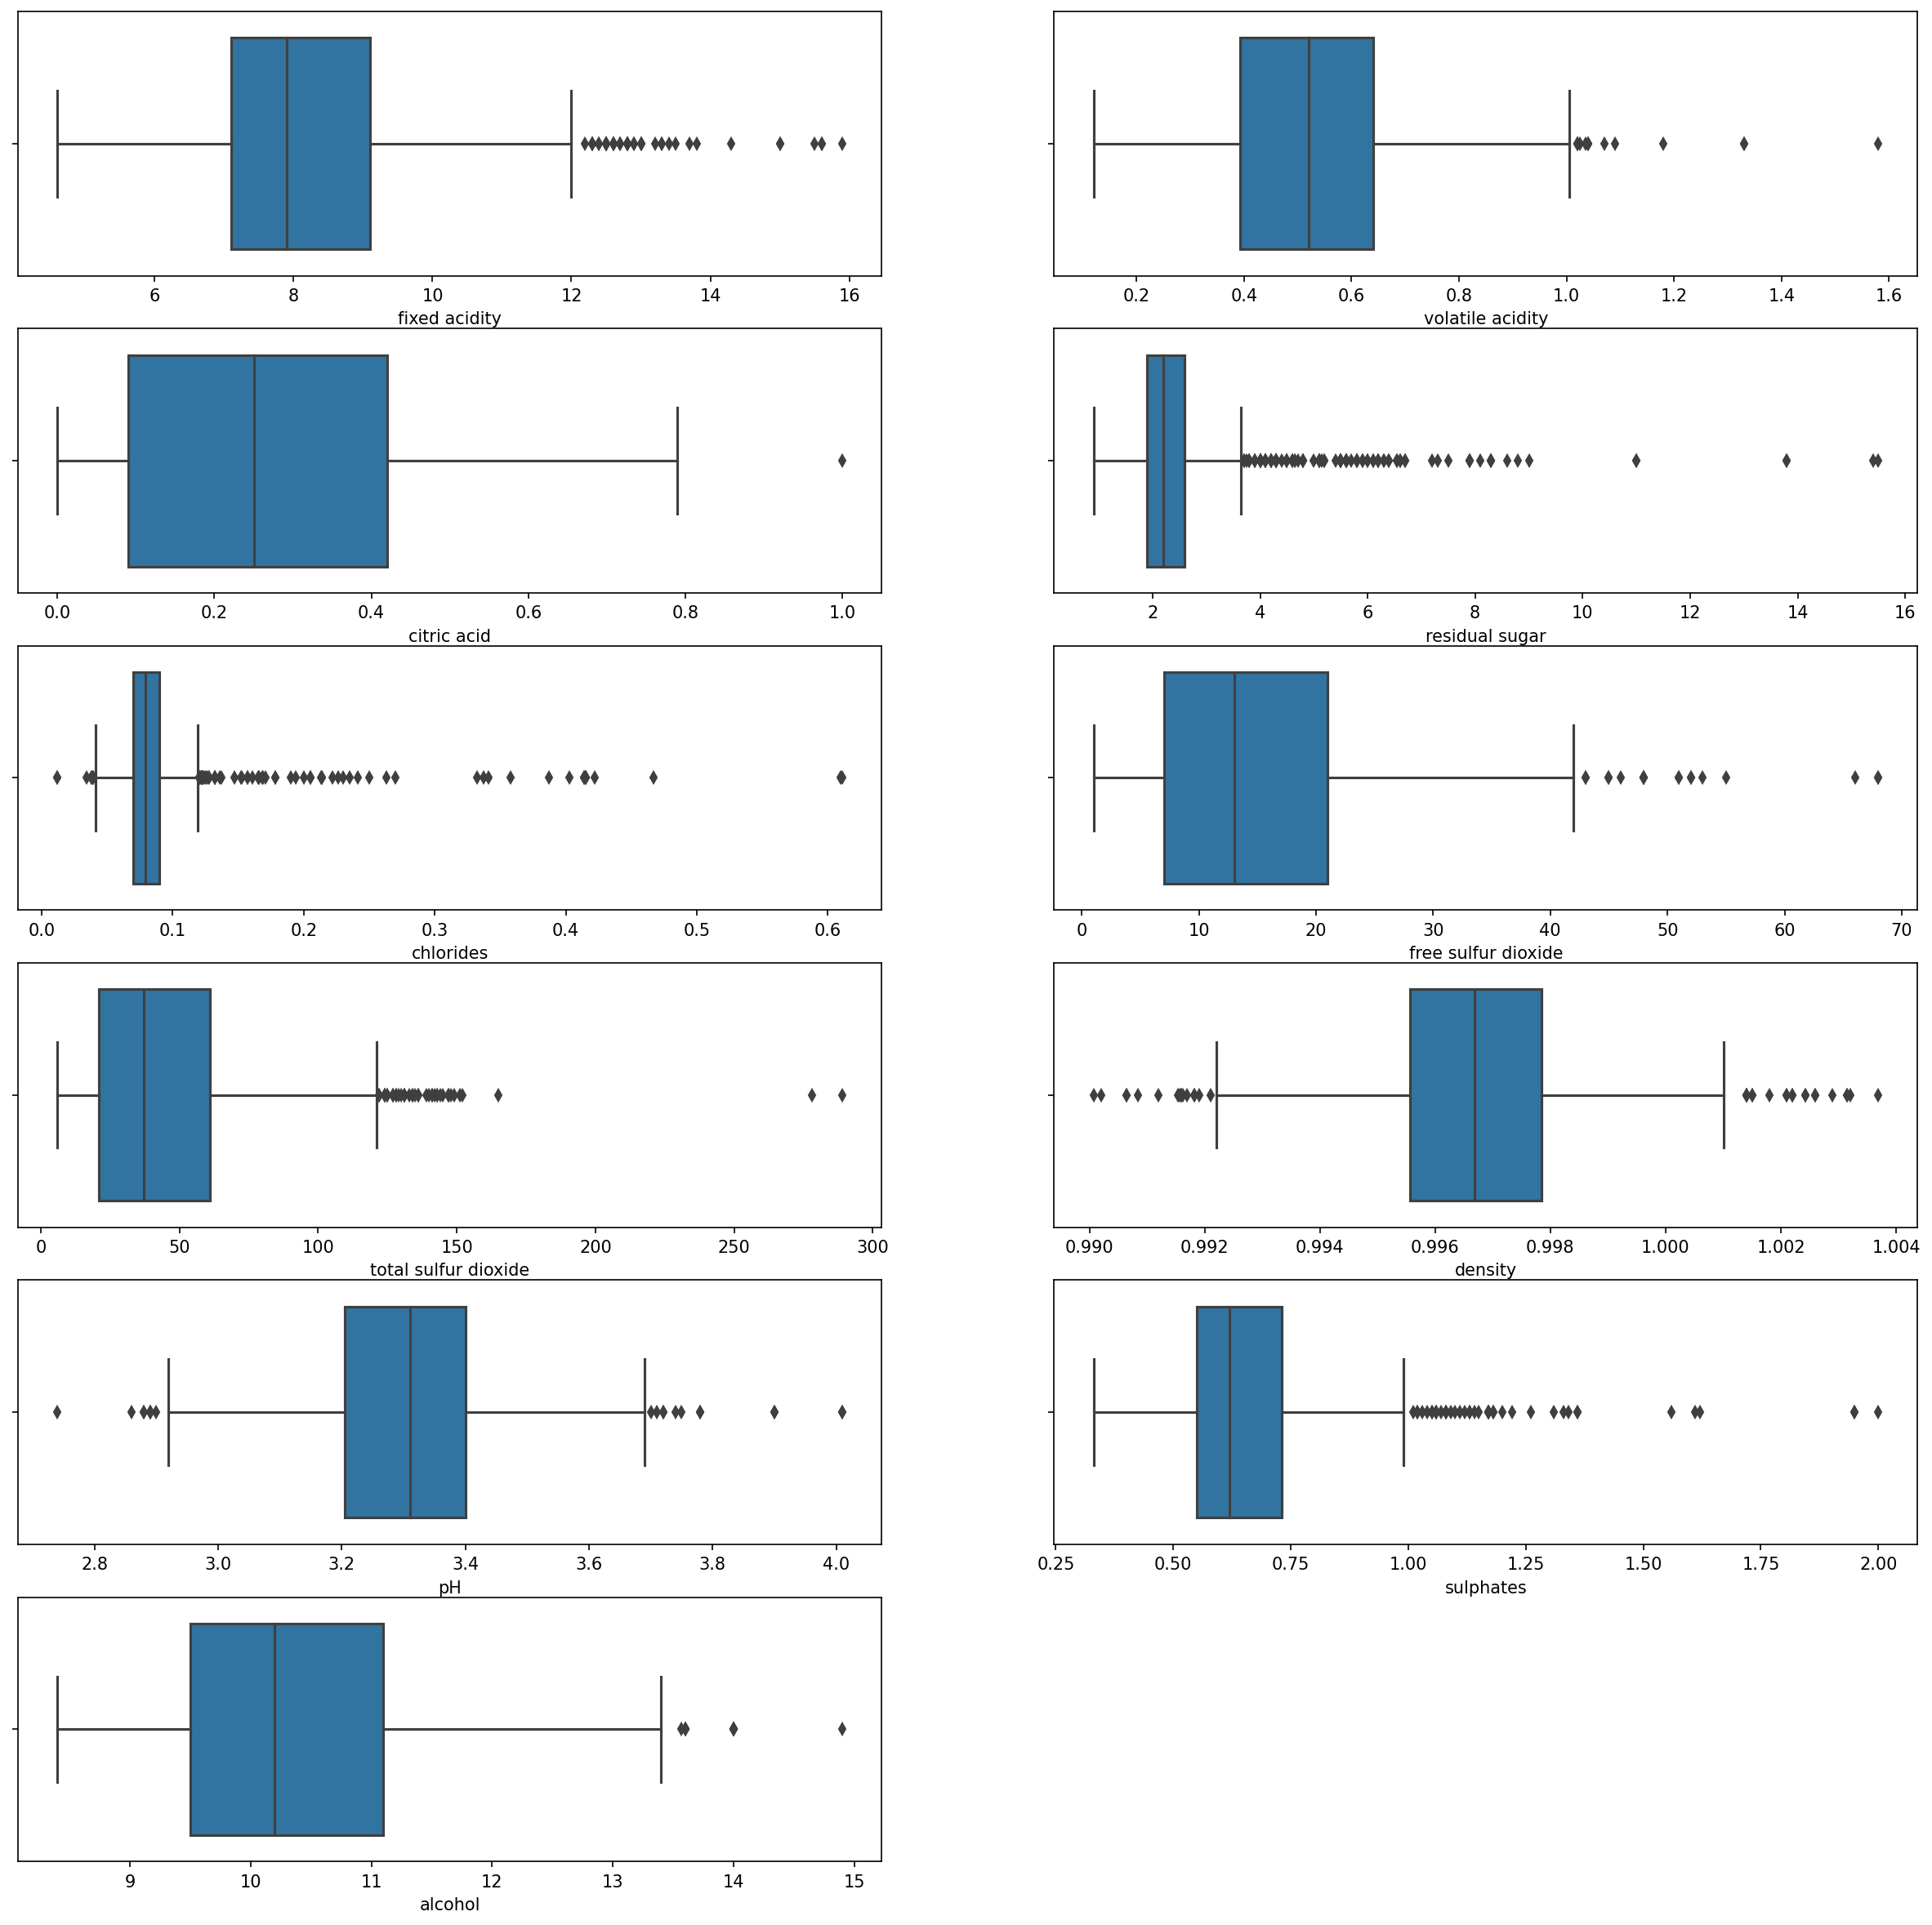

In [25]:
plt.figure(figsize=(20, 20), dpi=150)
for i, c in enumerate(col):
    plt.subplot(6,2, i+1)
    sns.boxplot(wine[c])
    plt.plot()

## Preprocessing Data for performing Machine learning algorithms

In [30]:
# Wine Quality 7 or higher is classified as 'good/1' and the remainder as 'not good/0'.
# Dividing wine as good and bad by giving the limit for the quality

wine['quality'] = wine['quality'].apply(lambda x: 0 if (x < 7)  else 1)

In [32]:
wine['quality'].value_counts()

0    984
1    159
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

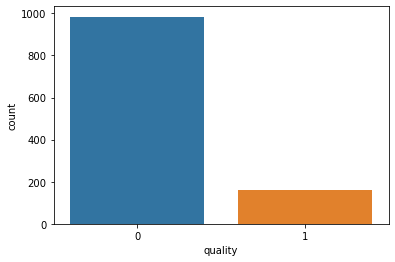

In [33]:
sns.countplot(wine['quality'])

In [39]:
# seperate the dataset 
X = wine.drop('quality', axis = 1)
Y = wine['quality']

In [40]:
#Train and Test splitting of data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75, random_state=3)

In [42]:
#Applying Standard scaling to get optimized result
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Performing Machine Learning Algorithm

In [44]:
rf =RandomForestClassifier()

In [47]:
# Fitting model on data
rf.fit(X_train, Y_train)

# prediction of data
Pred_Y_test = rf.predict(X_test)

In [48]:
print(classification_report(Y_test, Pred_Y_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       237
           1       0.87      0.27      0.41        49

    accuracy                           0.87       286
   macro avg       0.87      0.63      0.67       286
weighted avg       0.87      0.87      0.84       286



### Random forest gives the accuracy of 87%

In [50]:
#Confusion matrix 
print(confusion_matrix(Y_test, Pred_Y_test))

[[235   2]
 [ 36  13]]


## Stochastic Gradient Decent Classifier

In [51]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, Y_train)
Pred_sgd = sgd.predict(X_test)

In [52]:
print(classification_report(Y_test, Pred_sgd))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       237
           1       0.47      0.41      0.43        49

    accuracy                           0.82       286
   macro avg       0.67      0.66      0.66       286
weighted avg       0.81      0.82      0.81       286



### Stochastic Gradient Decent Classifier gives the accuracy of 82%

In [53]:
#Confusion matrix 
print(confusion_matrix(Y_test, Pred_sgd))

[[214  23]
 [ 29  20]]


## Support Vector Classifier

In [54]:
svc = SVC()
svc.fit(X_train, Y_train)
Pred_svc = svc.predict(X_test)

In [55]:
print(classification_report(Y_test, Pred_svc))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       237
           1       0.94      0.31      0.46        49

    accuracy                           0.88       286
   macro avg       0.91      0.65      0.70       286
weighted avg       0.88      0.88      0.85       286



### Support Vector Classifier gives the accuracy of 88%

In [57]:
#Confusion matrix 
print(confusion_matrix(Y_test, Pred_svc))

[[236   1]
 [ 34  15]]


## Grid Search CV

In [58]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [59]:
grid_svc.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [60]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1, 'kernel': 'rbf'}

In [61]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.4, gamma =  1, kernel= 'rbf')
svc2.fit(X_train, Y_train)
Pred_svc2 = svc2.predict(X_test)
print(classification_report(Y_test, Pred_svc2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       237
           1       0.90      0.39      0.54        49

    accuracy                           0.89       286
   macro avg       0.90      0.69      0.74       286
weighted avg       0.89      0.89      0.87       286



### Support Vector Classifier gives the accuracy of 89% (Previsous accuracy was 88%)

In [63]:
## Cross Validation Score for random forest and SGD
rfc_eval = cross_val_score(estimator = rf, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.8844186046511628

### Random Forest gives the accuracy of 88.4% (Previsous accuracy was 87%)